In [1]:
#-*-coding:utf-8-*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (14,4)

In [3]:
subway = pd.read_csv("서울교통공사 2020년 일별 시간대별 역별 승하차 인원(1_8호선).csv",encoding = 'cp949')
subway['날짜'] = pd.to_datetime(subway['날짜'], format='%Y-%m-%d')
subway.drop(['역번호'],axis = 1, inplace = True)
subway.head(1)

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
0,2020-01-01,1호선,서울역,승차,356,280,313,774,923,1418,...,2972,3194,3342,3002,2857,2311,2523,1830,987,25


In [4]:
# for i in range(subway[['역명','호선']].drop_duplicates().shape[0]) :
#     print("{} {}".format(subway[['역명','호선']].drop_duplicates()['호선'].iloc[i],
#                             subway[['역명','호선']].drop_duplicates()['역명'].iloc[i]), end = ',' )

In [164]:
import cycler

n = 24
color = plt.cm.Accent(np.linspace(0, 1,n))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

def plot_station(df,name,line = None ,type_ = None):
    
    if type_ == None : 
        # take all data of one station with given name
        df_station = df[df['역명'] == name]
    else : 
        # take all data raw of one station with given name and type['승차':'하차']
        df_station = df[df['역명'] == name][df[df['역명'] == name]['구분'].str.contains(type_)]
        
    
    
    if line == None :
        df_station_line = df_station
    else : 
        df_station_line = df_station[df_station['호선'] == line]
    
    
    s2020 = df_station_line.iloc[0:366]
    
#     s2016 = df_station_line.iloc[365:365+366,:-4]
#     s2017 = df_station_line.iloc[365+366:365+366+365,:-4]
#     s2018 = df_station_line.iloc[365+366+365:365+366+365+365,:-4]
#     s2019 = df_station_line.iloc[365+366+365+365:,:-4]

    s2020 = s2020.drop('구분',axis=1).set_index('날짜')
#     s2016 = s2016.drop('구분',axis=1).set_index('날짜')
#     s2017 = s2017.drop('구분',axis=1).set_index('날짜')
#     s2018 = s2018.drop('구분',axis=1).set_index('날짜')
#     s2019 = s2019.drop('구분',axis=1).set_index('날짜')

    s2020 = s2020.drop('역명',axis=1).drop('호선',axis=1)
    
    plt.figure(figsize=(35,30))
        
    plt.subplot(511)
    plt.plot(s2020)
    plt.legend(labels = tuple(s2020.columns),fontsize = 'small')

#     plt.subplot(512)
#     plt.plot(s2016)

#     plt.subplot(513)
#     plt.plot(s2017)

#     plt.subplot(514)
#     plt.plot(s2018)

#     plt.subplot(515)
#     plt.plot(s2019)

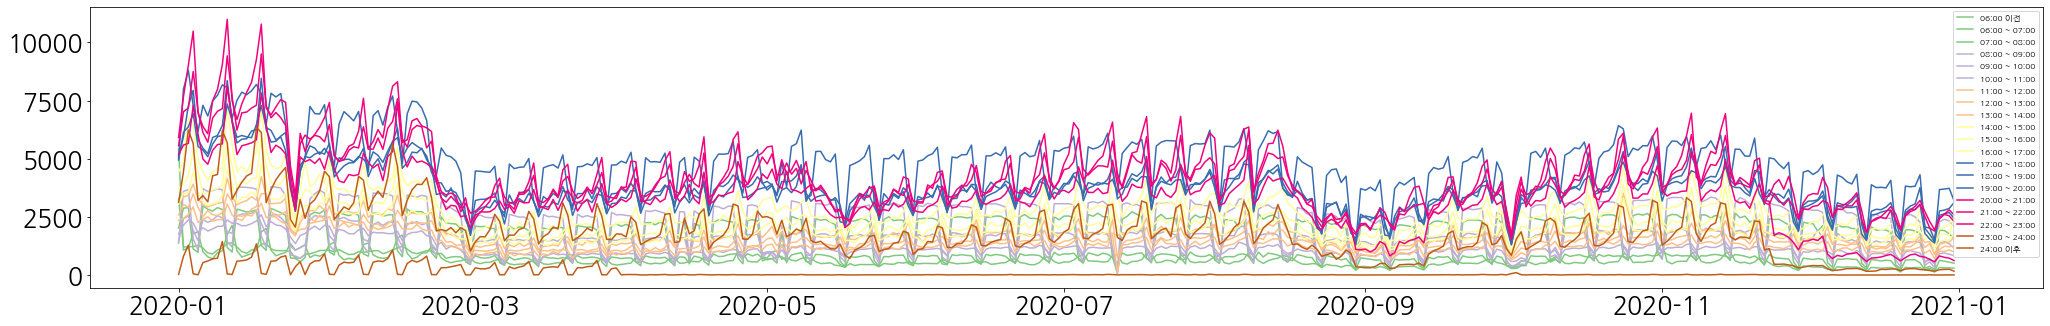

In [165]:
plot_station(df = subway, name = '홍대입구', line = "2호선", type_ = '승차')

In [169]:
subway_groupby = subway.groupby(['날짜','역명','구분']).sum()
subway_groupby = subway_groupby.reset_index()

take_sum_line = subway_groupby[subway_groupby['구분'] == '승차']
off_sum_line = subway_groupby[subway_groupby['구분'] == '하차']

take_sum_line.drop('구분',axis=1,inplace = True)
off_sum_line.drop('구분',axis=1,inplace = True)

take_sum_line.set_index('날짜',inplace = True)
off_sum_line.set_index('날짜',inplace = True)

In [177]:
def Y_max_time(take_df,off_df,name,type_ = None) :
    
    if type_ == 'df':
        return df[df['역명'] == name].resample('Y').mean().T.style.background_gradient(cmap = 'Wistia')
    else :
        plt.figure(figsize=(30,10))     
        plt.subplot(121)
        plt.xticks(rotation = 70)
        plt.title('승차', fontsize=20)
        plt.plot(take_df[take_df['역명'] == name].resample('Y').mean().T)
        plt.legend(labels = take_df.index)
        
        plt.subplot(122)
        plt.xticks(rotation = 70)
        plt.title('하차', fontsize=20)
        plt.plot(off_df[off_df['역명'] == name].resample('Y').mean().T)
        plt.legend(labels = off_df.index)
        

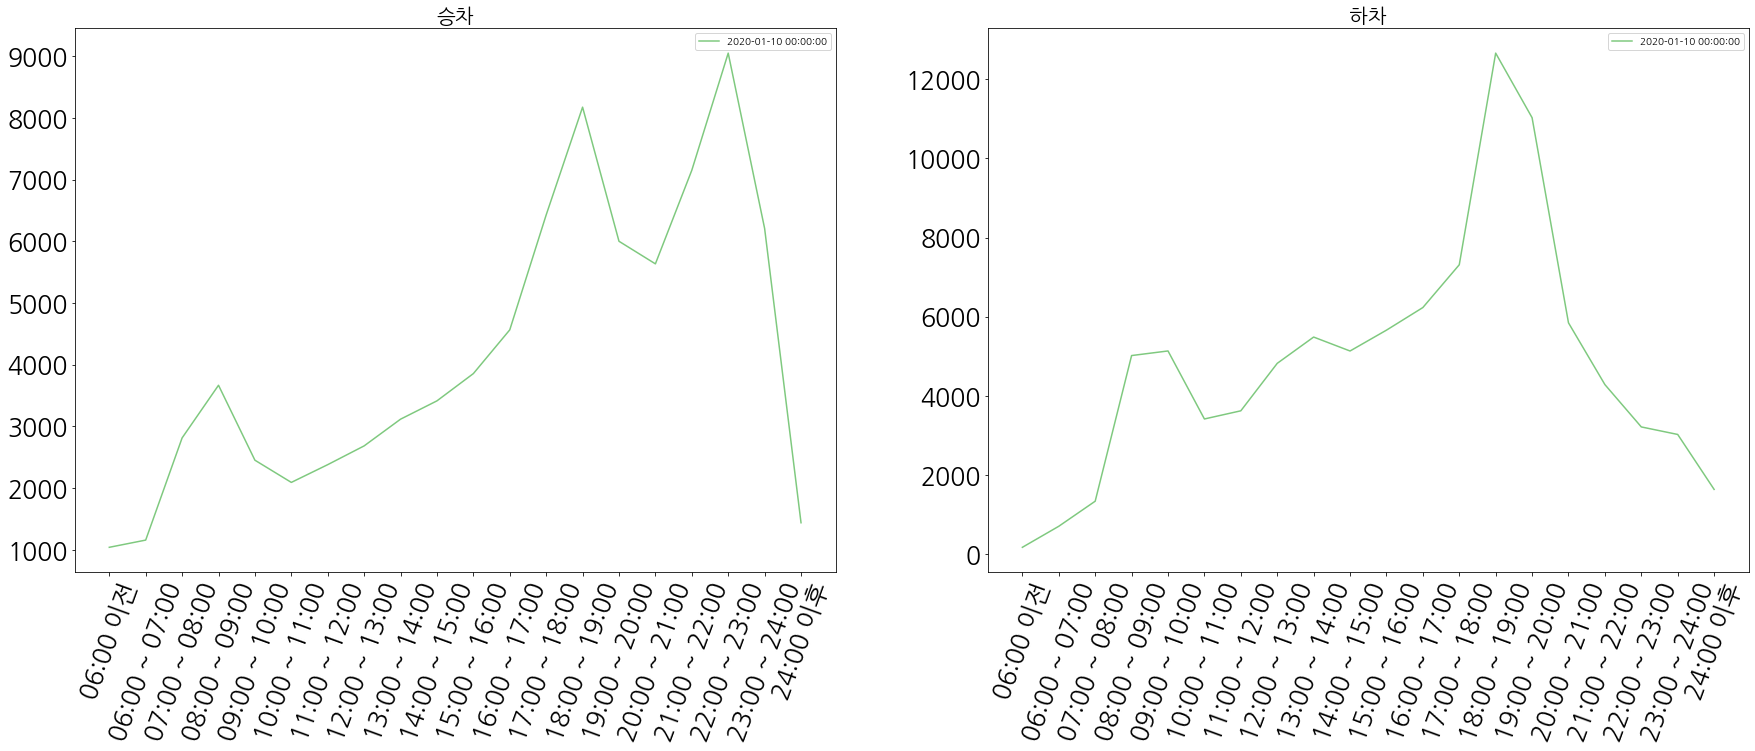

In [178]:
Y_max_time(take_sum_line,off_sum_line, '홍대입구')

In [174]:
Y0110= subway[subway["날짜"]=="2020-01-10"]

In [175]:
subway_groupby = Y0110.groupby(['날짜','역명','구분']).sum()
subway_groupby = subway_groupby.reset_index()

take_sum_line = subway_groupby[subway_groupby['구분'] == '승차']
off_sum_line = subway_groupby[subway_groupby['구분'] == '하차']

take_sum_line.drop('구분',axis=1,inplace = True)
off_sum_line.drop('구분',axis=1,inplace = True)

take_sum_line.set_index('날짜',inplace = True)
off_sum_line.set_index('날짜',inplace = True)

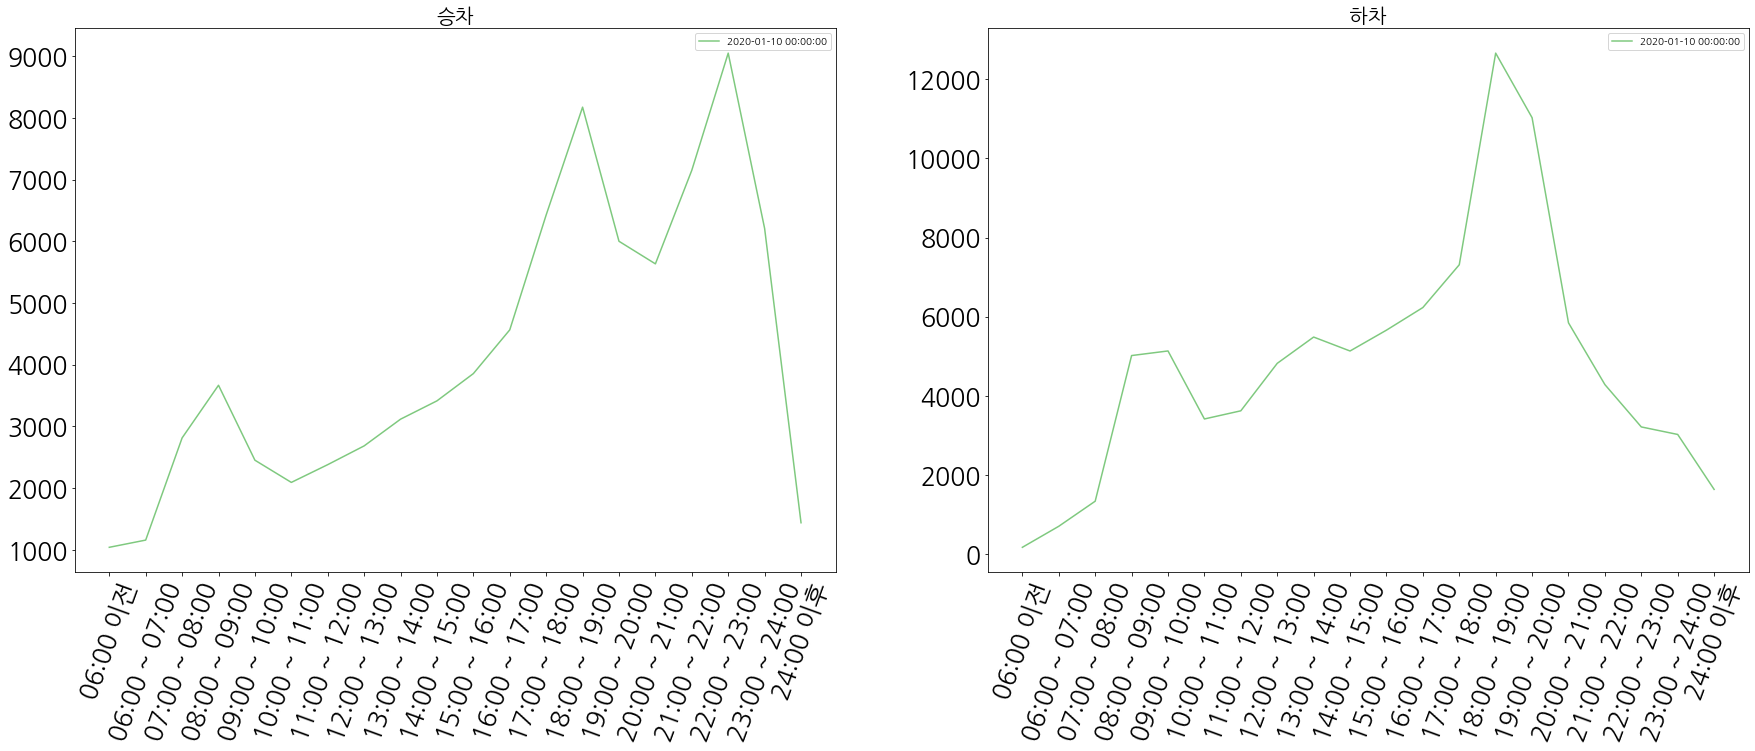

In [176]:
Y_max_time(take_sum_line,off_sum_line, '홍대입구')

In [10]:
import matplotlib 
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)

def plot_total(df1,df2,name):
    plt.figure(figsize=(40,10))
    
    plt.subplot(211)
    plt.title('승차')
    plt.plot(df1[df1['역명'] == name].drop('역명',axis=1).T.sum(),'k')
    plt.plot(df1[df1['역명'] == name].drop('역명',axis=1).T.sum().resample('Q').mean(),'r')
    plt.tight_layout()

    plt.figure(figsize=(40,10))
    plt.subplot(212)
    plt.title('하차')
    plt.plot(df2[df2['역명'] == name].drop('역명',axis=1).T.sum(),'k')
    plt.plot(df2[df2['역명'] == name].drop('역명',axis=1).T.sum().resample('Q').mean(),'r')
    plt.tight_layout()

In [11]:
plot_total(tak)

NameError: name 'tak' is not defined